# Use LEAD_CONV_Snowpark38_XL Notebook template

In [1]:
from snowflake.snowpark import Session
from snowflake.connector.pandas_tools import write_pandas

# Data Science Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

Matplotlib created a temporary cache directory at /tmp/matplotlib-olxr_gp6 because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from fosforio import snowflake

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


In [3]:
# To get snowflake connection object with a default snowflake connection created by the user, if available.
snowflake.get_connection()

User name picked from OS env: manishh.singh@fosfor.com
Fetching connections created by manishh.singh@fosfor.com user
Connection names fetched ['FDC_SNOWFLAKE', 'FDC_SNOWFLAKE', 'FDC_SNOWFLAKE', 'FDC_Insurance_Snowflake', 'FDC_Banking_FS_Snowflake', 'FDC_Banking_FS_Snowflake', 'FDC_Insurance_Snowflake', 'BFS_LEAD_CONV_CXN'], created by manishh.singh@fosfor.com
Exception occurred in getting snowflake connection: 'connectionSources'


# MASTER data

In [4]:
# To read a specific dataset published from a snowflake connection
df = snowflake.get_dataframe("MASTER")

In [5]:
df.shape

(368494, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368494 entries, 0 to 368493
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   368494 non-null  object 
 1   GENDER               368494 non-null  object 
 2   DOB                  368494 non-null  object 
 3   CITY                 368494 non-null  object 
 4   STATE                368494 non-null  object 
 5   AGE                  368494 non-null  int8   
 6   MONTHLY_INCOME       368494 non-null  float64
 7   EMPLOYER_NAME        368494 non-null  object 
 8   SALARY_ACCOUNT       368494 non-null  object 
 9   LOAN_AMOUNT_APPLIED  368438 non-null  float64
 10  LOAN_TENURE_APPLIED  368438 non-null  float64
 11  EXISTING_EMI         368438 non-null  float64
 12  LEAD_CREATION_DATE   368494 non-null  object 
 13  MONTH                368494 non-null  int8   
 14  YEAR                 368494 non-null  int16  
 15  QUARTER          

In [7]:
df.describe()

,AGE,MONTHLY_INCOME,LOAN_AMOUNT_APPLIED,LOAN_TENURE_APPLIED,EXISTING_EMI,MONTH,YEAR,QUARTER,VAR4,VAR5,DISBURSED
count,368494.000000,3.684940e+05,3.684380e+05,368438.000000,368438.000000,368494.000000,368494.000000,368494.000000,368494.000000,368494.000000,368494.000000
mean,35.481783,1.145437e+03,6.862932e+05,3.080198,84.272824,6.448783,2023.139492,2.484673,3.572791,7.931483,0.402747
std,6.282298,6.276703e+03,3.097598e+05,0.705796,398.089344,3.220255,0.831348,1.051807,1.939919,6.441635,0.490451
min,25.000000,0.000000e+00,4.000000e-02,0.000000,0.000000,1.000000,2022.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,9.290000e+02,7.000000e+05,3.000000,0.000000,4.000000,2022.000000,2.000000,2.000000,0.000000,0.000000
50%,35.000000,1.129000e+03,8.000000e+05,3.000000,0.000000,6.000000,2023.000000,2.000000,3.000000,10.000000,0.000000
75%,41.000000,1.297809e+03,9.000000e+05,3.000000,132.000000,9.000000,2024.000000,3.000000,5.000000,14.000000,1.000000
max,100.000000,2.402003e+06,6.000000e+06,10.000000,200000.000000,12.000000,2024.000000,4.000000,7.000000,18.000000,1.000000


In [8]:
df.describe(include='O')

,ID,GENDER,DOB,CITY,STATE,EMPLOYER_NAME,SALARY_ACCOUNT,LEAD_CREATION_DATE,MOBILE_VERIFIED,FILLED_FORM,DEVICE_TYPE,VAR2,SOURCE,VAR1
count,368494,368494,368494,368494,368494,368494,368494,368494,368494,368494,368494,368494,368494,368494
unique,218989,2,11842,686,51,98,35,1143,2,2,2,7,27,19
top,ID000536b56,Male,11/11/1989,New York,California,Adobe,Bank of Hope,18/7/1924,Y,N,Web-browser,B,S122,HBXX
freq,256,252019,347,67851,136864,8078,103677,1181,277185,201456,209790,96128,43890,239944


#### The dataset includes 25 columns and 3,68,494 entries.

#### It consists of:

####                   11 numerical features (Disbursed - target variable)
####                   14 continuous


###### The ID column contains unique values for each sample and cannot be used for prediction.
###### The LoggedIn column indicates whether a complete loan application has been submitted and is for problem understanding purposes only. It cannot be used for prediction.
###### The meaning of Var1, Var2, Var4, Var5 and Source is unknown

In [9]:
df.isnull().sum()

ID                      0
GENDER                  0
DOB                     0
CITY                    0
STATE                   0
AGE                     0
MONTHLY_INCOME          0
EMPLOYER_NAME           0
SALARY_ACCOUNT          0
LOAN_AMOUNT_APPLIED    56
LOAN_TENURE_APPLIED    56
EXISTING_EMI           56
LEAD_CREATION_DATE      0
MONTH                   0
YEAR                    0
QUARTER                 0
MOBILE_VERIFIED         0
FILLED_FORM             0
DEVICE_TYPE             0
VAR2                    0
SOURCE                  0
VAR4                    0
VAR5                    0
VAR1                    0
DISBURSED               0
dtype: int64

In [15]:
df.shape

(368494, 25)

In [17]:
df = df.drop_duplicates(subset='ID', keep="last")

In [18]:
df.shape

(218989, 25)

In [19]:
df['DISBURSED'].value_counts()

DISBURSED
0.0    139953
1.0     79036
Name: count, dtype: int64

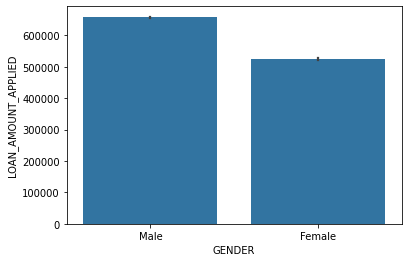

In [21]:
sns.barplot(x = 'GENDER',y = 'LOAN_AMOUNT_APPLIED',data = df)
plt.show()

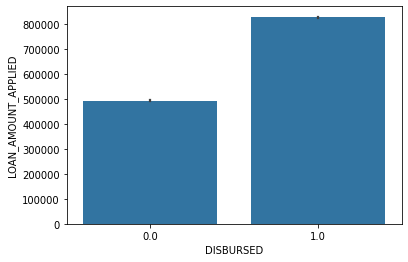

In [22]:
sns.barplot(x = 'DISBURSED',y = 'LOAN_AMOUNT_APPLIED',data = df)
plt.show()

Text(0.5, 1.0, 'Top 10 States for Loan Application')

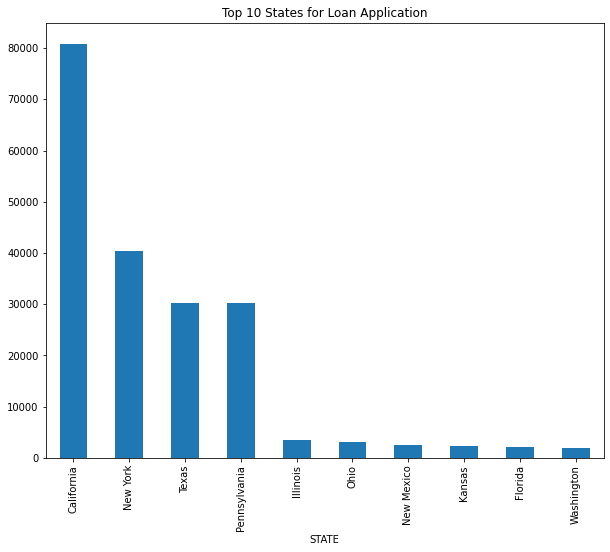

In [24]:
data = df.STATE.value_counts()[:10]
data.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 States for Loan Application')

Text(0.5, 1.0, 'Top 10 CITY for Loan Application')

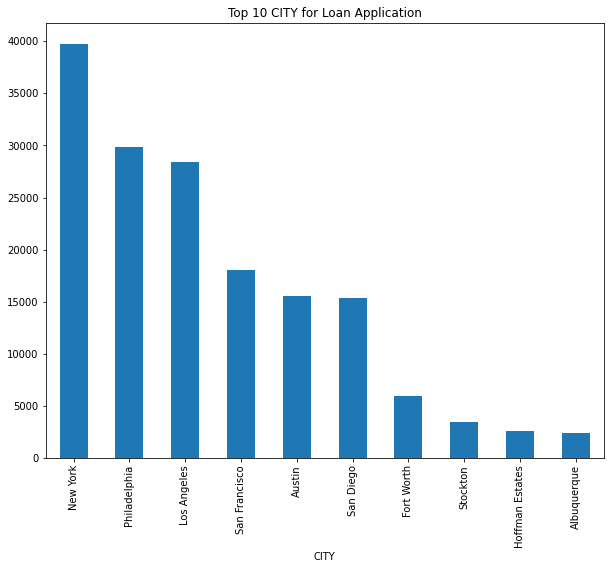

In [25]:
data = df.CITY.value_counts()[:10]
data.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 CITY for Loan Application')